In [1]:
import re, sys
from collections import Counter
from matplotlib import pyplot
import numpy, pandas
from IPython.display import display, Markdown
import json
import os,fnmatch
from datetime import datetime


In [2]:
def load_word_weights(lexicon_file):

    ## Create a mapping from words to numbers
    word_weights = {}
    with open(lexicon_file) as lexicon_reader:
        for line in lexicon_reader:
            weight, word = line.split(",")
            word=word.rstrip()## split on comma
            word_weights[word] = float(weight) ## convert string to number
    
    return word_weights

In [3]:
word_weights = load_word_weights("bingliu.csv")
word_weights

{'2-faced': -1.0,
 '2-faces': -1.0,
 'abnormal': -1.0,
 'abolish': -1.0,
 'abominable': -1.0,
 'abominably': -1.0,
 'abominate': -1.0,
 'abomination': -1.0,
 'abort': -1.0,
 'aborted': -1.0,
 'aborts': -1.0,
 'abrade': -1.0,
 'abrasive': -1.0,
 'abrupt': -1.0,
 'abruptly': -1.0,
 'abscond': -1.0,
 'absence': -1.0,
 'absent-minded': -1.0,
 'absentee': -1.0,
 'absurd': -1.0,
 'absurdity': -1.0,
 'absurdly': -1.0,
 'absurdness': -1.0,
 'abuse': -1.0,
 'abused': -1.0,
 'abuses': -1.0,
 'abusive': -1.0,
 'abysmal': -1.0,
 'abysmally': -1.0,
 'abyss': -1.0,
 'accidental': -1.0,
 'accost': -1.0,
 'accursed': -1.0,
 'accusation': -1.0,
 'accusations': -1.0,
 'accuse': -1.0,
 'accuses': -1.0,
 'accusing': -1.0,
 'accusingly': -1.0,
 'acerbate': -1.0,
 'acerbic': -1.0,
 'acerbically': -1.0,
 'ache': -1.0,
 'ached': -1.0,
 'aches': -1.0,
 'achey': -1.0,
 'aching': -1.0,
 'acrid': -1.0,
 'acridly': -1.0,
 'acridness': -1.0,
 'acrimonious': -1.0,
 'acrimoniously': -1.0,
 'acrimony': -1.0,
 'adamant

In [4]:
## This function applies the word weights to a list of word counts
def score_counts(counter, word_weights):
    ## accumulate word weights in this variable
    score = 0
    
    ## count the words in the passage
    total_tokens = sum(counter.values())
    ## check for empty segments
    if total_tokens == 0:
        return 0
    
    ## for each word, look up its score
    for word in counter.keys():
        if word in word_weights:
            score += word_weights[word] * counter[word]
    return score/total_tokens
#     return score

#longer paragraphs arent overweighted

In [5]:


datetime_object = datetime.strptime('2019-05-07', '%Y-%M-%d')
datetime_object

datetime.datetime(2019, 1, 7, 0, 5)

In [6]:
def load_album(text_file):

    ## Here's an example of a simple pattern defining a word token. 
    word_pattern = re.compile("\w[\w\-\']*\w|\w") ## what matches this?

    ## Now look at the actual documents. We'll create a list with one object per text segment.
    paragraphs = []
    with open(text_file) as json_file:
        data = json.load(json_file)
#         print (type(data))
    ## here's where we actually read the file
#     with open(text_file, encoding="utf-8") as file:
#         print (type(file))
        ## This block reads a file line by line.
        for line in data["songs"]:
#             print (line)
#             print (type(line))
#             print (line[0])
            date=datetime.strptime(line["year"], '%Y-%M-%d')
            title=line['title']
            album=line['album']
            if album in ['Get Well Soon...','Kon the Louis Vuitton Don','I’m Good']:
#                 print (album)
                album="The College Dropout"
                print (album,"change") 
                line = line['lyrics'].rstrip()
    #             print (line)
                tokens = word_pattern.findall(line)
                tokens=[x.lower() for x in tokens]
    #             ## turn a list into a word->count map
                paragraph_counts = Counter(tokens)

    #             ## create the paragraph object, with the original text, 
    #             ##  the word counts, and the total score.
    #             print (line['title'])
                paragraphs.append({'title': title,'album':album,'text': line,"release_date":date, 'counts': paragraph_counts,
                               'score': score_counts(paragraph_counts, word_weights) })
            elif album in ['Can’t Tell Me Nothing']:
#                 print (album)
                album="Late Registration"
                print (album,"change") 
                line = line['lyrics'].rstrip()
    #             print (line)
                tokens = word_pattern.findall(line)
                tokens=[x.lower() for x in tokens]
    #             ## turn a list into a word->count map
                paragraph_counts = Counter(tokens)

    #             ## create the paragraph object, with the original text, 
    #             ##  the word counts, and the total score.
    #             print (line['title'])
                paragraphs.append({'title': title,'album':album,'text': line,"release_date":date, 'counts': paragraph_counts,
                               'score': score_counts(paragraph_counts, word_weights) })
            else:
                line = line['lyrics'].rstrip()
    #             print (line)
                tokens = word_pattern.findall(line)
                tokens=[x.lower() for x in tokens]
    #             ## turn a list into a word->count map
                paragraph_counts = Counter(tokens)

    #             ## create the paragraph object, with the original text, 
    #             ##  the word counts, and the total score.
    #             print (line['title'])
                paragraphs.append({'title': title,'album':album,'text': line,"release_date":date, 'counts': paragraph_counts,
                               'score': score_counts(paragraph_counts, word_weights) })
    return paragraphs

In [7]:
# def load_album(text_file):

#     ## Here's an example of a simple pattern defining a word token. 
#     word_pattern = re.compile("\w[\w\-\']*\w|\w") ## what matches this?

#     ## Now look at the actual documents. We'll create a list with one object per text segment.
#     paragraphs = []
#     with open(text_file) as json_file:
#         data = json.load(json_file)
# #         print (type(data))
#     ## here's where we actually read the file
# #     with open(text_file, encoding="utf-8") as file:
# #         print (type(file))
#         ## This block reads a file line by line.
#         for line in data["songs"]:
# #             print (line)
# #             print (type(line))
# #             print (line[0])
#             date=datetime.strptime(line["year"], '%Y-%M-%d')
#             title=line['title']
#             album=line['album']
#             line = line['lyrics'].rstrip()
# #             print (line)
#             tokens = word_pattern.findall(line)
#             tokens=[x.lower() for x in tokens]
# #             print (tokens)
# #             ## turn a list into a word->count map
#             paragraph_counts = Counter(tokens)
        
# #             ## create the paragraph object, with the original text, 
# #             ##  the word counts, and the total score.
# #             print (line['title'])
#             paragraphs.append({'title': title,'album':album,'text': line,"release_date":date, 'counts': paragraph_counts,
#                                'score': score_counts(paragraph_counts, word_weights) })

#     return paragraphs

In [8]:
#for one album
songs = load_album("../male_lyrics/Lyrics_Tyler,TheCreator{.Igor.json")

In [9]:
songs

[{'title': 'IGOR’S THEME',
  'album': 'IGOR',
  'text': "What, what, what, what, what, what, what, what, what, what?\nUh!\nRunnin', runnin’, runnin', runnin'\nUh!\nHeaven, heaven (Ooh)\nHe’s coming\n\nRidin' 'round town, they gon' feel this one\nRidin' 'round town, they gon' feel this one\nRidin' ’round town, they gon’ feel this one\nRidin', ridin’ 'round town, they gon' feel this one\nGot my, got my, got my, got my eyes open\nGot my, got my, got my eyes open\nGot my, got my, got my, got my eyes open\nGot my eyes open\n\nOh, yeah (What)\nOh-oh-oh, yeah\nHe's comin’\nRunnin', runnin', runnin', runnin', runnin', runnin'\nWhat, what, what, what, what, what, what, what, what, what?\nHe's comin'\n\nRidin' 'round town, they gon' feel this one (They gon' feel this one)\nRidin' 'round town, they gon' feel this one\nRidin' 'round town, they gon' feel (They gon' feel this one)\nRidin', ridin' 'round town, they gon' feel this one, oh\n(Got my eyes open)\nI'm ridin', I'm ridin'\n(Got my, got my, g

In [10]:
sorted_song = sorted(songs, key=lambda x: x["score"])
#paragraphs are very long, the number of words is proprotional to a larger scores
## Display the 10 most negative
for song in sorted_song[0:9]:
    print("{}\n{}".format(song['score'], song['text']))

## ... and the 10 most positive
for song in sorted_song[-10:]:
    print ()
    print (song['title'])
    print("{}\n{}".format(song['score'], song['text']))
    
#smoothing parameter?

-0.04155844155844156
For real, for real this time
For real, for real, for real this time
Bitch, I cannot fall short
For real, for real, for real this time (Yeah, yeah)
For real, for real, for real this time

'Cause you make my earth quake
Oh, you make my earth quake
Riding around, your love be shakin’ me up
And it's making my heart break
'Cause you make my earth quake
Oh, you make my earth quake (Earthquake, ooh)
Riding around, your love be shakin’ me up
And it's making my heart break

Don't leave, it's my fault
Don't leave, it's my fault
Don't leave, it's my fault (Girl)
’Cause when it all comes crashing down I’ll need you

'Cause you make my earth quake
Oh, you make my earth quake
Riding around, you’re telling me something is bad
And it's making my heart break
'Cause you make my earth quake, oh, you make my earth quake
(Earth quake, yeah)
Riding around, your love be shakin' me up
And it’s making my heart break (You already know)

We ain't gotta ball, D. Rose, huh
I don't give a fuck 

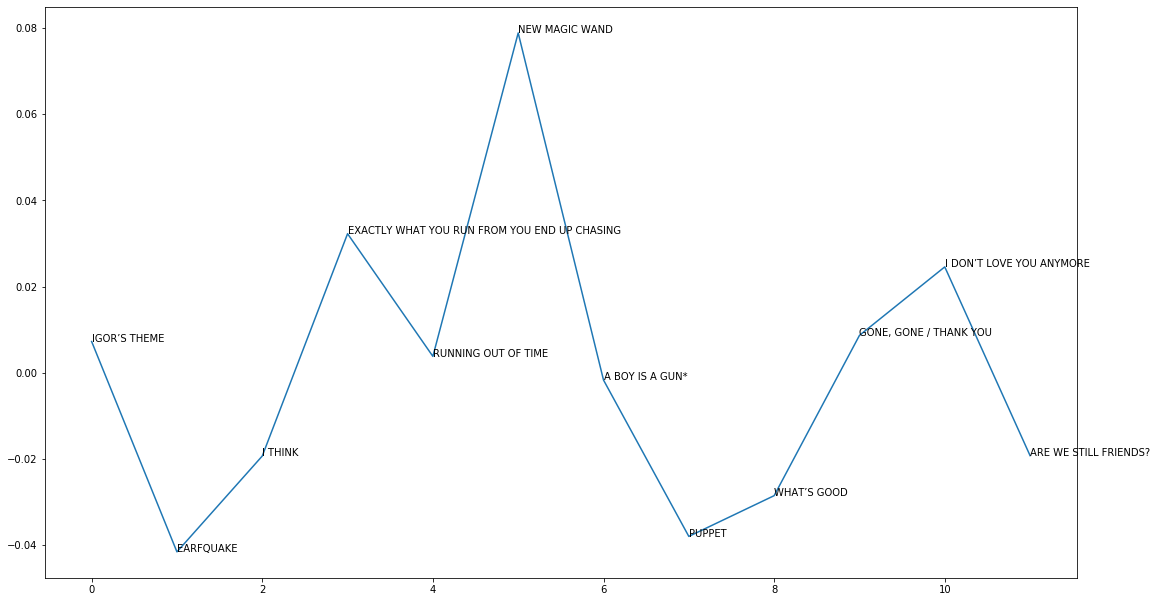

In [11]:
sentiment_scores = numpy.array([p["score"] for p in songs])
title = numpy.array([p["title"] for p in songs])
# pyplot.figure(figsize=(20, 5))
# pyplot.plot(sentiment_scores)
# pyplot.show()

from matplotlib.pyplot import figure
# figure(num=None, figsize=(40, 40), dpi=80, facecolor='w', edgecolor='k')
fig, ax = pyplot.subplots()
ax.plot(sentiment_scores)
# for i in enumerate(range(len(sentiment_scores))):
#     print (i)
for i in range(len(sentiment_scores)):
    ax.annotate(title[i],(i,sentiment_scores[i]))
fig = pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

In [55]:
def find_all(name, path):
    l={}
    for filename in os.listdir(path):
#         print (filename)
        if fnmatch.fnmatch(filename,"*"+name+"*"):
#             print (filename)
#             print (load_album("../"+filename)[0]['release_date'])
            l[filename]=load_album("../male_lyrics/"+filename)[0]['release_date']
#     sorted_songs_artist = sorted(l, key=lambda x: x["release_date"])    
    l={k: v for k, v in sorted(l.items(), key=lambda item: item[1])}
    print (list(l.keys()))
    sortedl=list(l.keys())
    return sortedl

In [56]:
find_all("Tyler","../male_lyrics")

['Lyrics_Tyler,TheCreator{.Bastard.json', 'Lyrics_Tyler,TheCreator{.Goblin.json', 'Lyrics_Tyler,TheCreator{.Cherry-Bomb.json', 'Lyrics_Tyler,TheCreator{.Flower-Boy.json', 'Lyrics_Tyler,TheCreator{.Igor.json']


['Lyrics_Tyler,TheCreator{.Bastard.json',
 'Lyrics_Tyler,TheCreator{.Goblin.json',
 'Lyrics_Tyler,TheCreator{.Cherry-Bomb.json',
 'Lyrics_Tyler,TheCreator{.Flower-Boy.json',
 'Lyrics_Tyler,TheCreator{.Igor.json']

In [57]:
#all albums for the artist

def load_artist(artist):
    
    complete=[]
    filenames=find_all(artist,"../male_lyrics")
    
    
    for file in filenames:
         complete.extend(load_album("../male_lyrics/"+file))
      
    
    return complete

In [58]:
# Every song and theire score for one artist in a dictionary
completeartist=load_artist("Tyler,")
# print (completeartist)

['Lyrics_Tyler,TheCreator{.Bastard.json', 'Lyrics_Tyler,TheCreator{.Goblin.json', 'Lyrics_Tyler,TheCreator{.Cherry-Bomb.json', 'Lyrics_Tyler,TheCreator{.Flower-Boy.json', 'Lyrics_Tyler,TheCreator{.Igor.json']


In [59]:
completeartist

[{'title': 'Bastard',
  'album': 'Bastard',
  'text': 'Yo, fuck 2DopeBoyz and fuck Nah Right\nAnd any other fuck-nigga-ass blog that can\'t put an 18 year old nigga\nMaking his own fucking beats, covers, videos and all that shit\nFuck you post-Drake-ass cliche-jerking, LA-slauson rapping\nFuck-nigga-ass Hypebeast niggas, now back to the album\n\nWell, Tyler, hi, I\'m Dr. TC and um, I\'m guessing that your teacher sent you here to talk \'cause you were misbehaving\nUm, it\'s gonna be three sessions: today, tomorrow, and the next day\nSo, just tell me something about yourself...\nWell, look, if you don\'t talk, I mean, these sessions are going to go slower\n\nThis is what the devil plays before he goes to sleep\nSome food for thought? This food for death, go ahead and fucking eat\nMy father\'s dead, well I don\'t know, we\'ll never fucking meet\nI cut my wrist and play piano cause I\'m so depressed\nSomebody call the pastor, this bastard is so possessed\nThis meeting just begun, nigga I\

In [60]:
sorted_songs_artist = sorted(completeartist, key=lambda x: x["score"])
#paragraphs are very long, the number of words is proprotional to a larger scores
## Display the 10 most negative
for song in sorted_songs_artist[0:9]:
    print("{}\n{}".format(song['score'], song['text']))




-0.22889305816135083
Oh, shit (Swag)
Three icy ass niggas from Odd Future doin' some crazy shit (Bitch)
By the way, we do punch bitches, huh

I'm swagging bitch (Swag), I'm iced out (Iced out)
Oh, you mad, bitch? (Bitch) 'Cause I'm laying on the couch (Woo)
Smoke a blunt, fuck a bitch in the butt, I'm bossing (Bow, bow)
Don't give a fuck, I never roll Slauson
I'm fly bitch, I should poke you in your eye bitch
Got the burner bitch, bow, bow (Bow)
You dead bitch, I'm hot as fuck
I ain't never cold, but I'm icy bitch (Woo)

My bitch suck dick like she suck dick
My bitch suck dick like she suck dick (Bow, bow, bow)
My bitch suck dick like (What) she suck dick
My bitch suck dick like she suck dick (Bow, bow)

Got the bops in the house, socking bitches in they mouth (Bitch)
See my neck? Iced the fuck out (I'm getting money, nigga)
She at the fucking mall, 40 bitches on my nutsack
I pulled up on a mothafuckin' unicorn (I'm getting ponies, nigga)
Wolf Gang, nigga
Scream that 'till they motherf

In [61]:
## ... and the 10 most positive
for song in sorted_songs_artist[-10:-1]:
    print("\n{}\n{}\n{}\n\n{}".format(song['score'],song['album'],song['title'],song['text']))
    
#smoothing parameter?


0.007246376811594203
IGOR
IGOR’S THEME

What, what, what, what, what, what, what, what, what, what?
Uh!
Runnin', runnin’, runnin', runnin'
Uh!
Heaven, heaven (Ooh)
He’s coming

Ridin' 'round town, they gon' feel this one
Ridin' 'round town, they gon' feel this one
Ridin' ’round town, they gon’ feel this one
Ridin', ridin’ 'round town, they gon' feel this one
Got my, got my, got my, got my eyes open
Got my, got my, got my eyes open
Got my, got my, got my, got my eyes open
Got my eyes open

Oh, yeah (What)
Oh-oh-oh, yeah
He's comin’
Runnin', runnin', runnin', runnin', runnin', runnin'
What, what, what, what, what, what, what, what, what, what?
He's comin'

Ridin' 'round town, they gon' feel this one (They gon' feel this one)
Ridin' 'round town, they gon' feel this one
Ridin' 'round town, they gon' feel (They gon' feel this one)
Ridin', ridin' 'round town, they gon' feel this one, oh
(Got my eyes open)
I'm ridin', I'm ridin'
(Got my, got my, got my eyes open)
Oh, yeah
(Got my, got my eye

In [62]:
import pandas as pd 
df = pd.DataFrame(completeartist)

print (type(df))
# df.groupby(["album"]).groups
df['score'].groupby(df['album']).describe()

<class 'pandas.core.frame.DataFrame'>


,count,mean,std,min,25%,50%,75%,max
album,,,,,,,,
Bastard,15.0,-0.033910,0.035552,-0.119481,-0.044497,-0.018182,-0.013949,0.000000
Cherry Bomb,14.0,-0.018370,0.037026,-0.090559,-0.030190,-0.020751,-0.009470,0.083333
Flower Boy,14.0,-0.002421,0.016926,-0.033661,-0.013646,-0.002616,0.009214,0.025114
Goblin,17.0,-0.061759,0.066922,-0.228893,-0.063474,-0.047041,-0.030534,0.006079
IGOR,12.0,0.000589,0.034013,-0.041558,-0.021623,0.001055,0.012639,0.078838


['Bastard' 'Bastard' 'Bastard' 'Bastard' 'Bastard' 'Bastard' 'Bastard'
 'Bastard' 'Bastard' 'Bastard' 'Bastard' 'Bastard' 'Bastard' 'Bastard'
 'Bastard' 'Goblin' 'Goblin' 'Goblin' 'Goblin' 'Goblin' 'Goblin' 'Goblin'
 'Goblin' 'Goblin' 'Goblin' 'Goblin' 'Goblin' 'Goblin' 'Goblin' 'Goblin'
 'Goblin' 'Goblin' 'Cherry Bomb' 'Cherry Bomb' 'Cherry Bomb' 'Cherry Bomb'
 'Cherry Bomb' 'Cherry Bomb' 'Cherry Bomb' 'Cherry Bomb' 'Cherry Bomb'
 'Cherry Bomb' 'Cherry Bomb' 'Cherry Bomb' 'Cherry Bomb' 'Cherry Bomb'
 'Flower Boy' 'Flower Boy' 'Flower Boy' 'Flower Boy' 'Flower Boy'
 'Flower Boy' 'Flower Boy' 'Flower Boy' 'Flower Boy' 'Flower Boy'
 'Flower Boy' 'Flower Boy' 'Flower Boy' 'Flower Boy' 'IGOR' 'IGOR' 'IGOR'
 'IGOR' 'IGOR' 'IGOR' 'IGOR' 'IGOR' 'IGOR' 'IGOR' 'IGOR' 'IGOR']


Text(0, 0.5, 'Sentiment score')

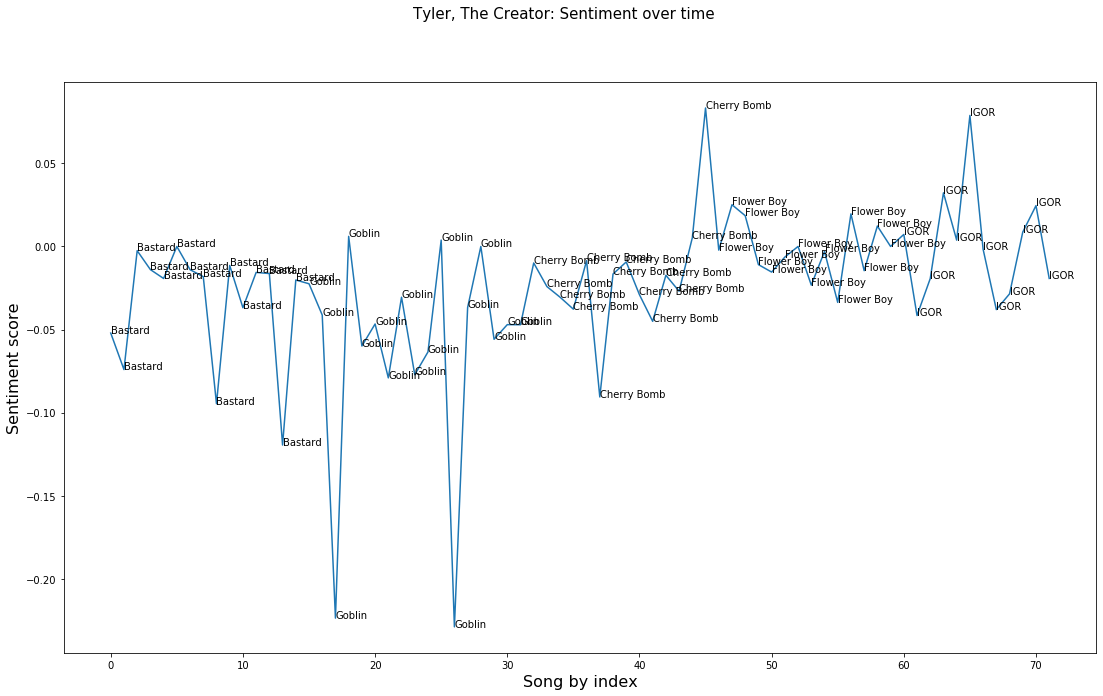

In [63]:
# sort by release date
# sorted_songs_artist = sorted(completeartist, key=lambda x: x["release_date"])
album = numpy.array([p["album"] for p in completeartist])
print (album)
sentiment_scores = numpy.array([p["score"] for p in completeartist])

from matplotlib.pyplot import figure
# figure(num=None, figsize=(40, 40), dpi=80, facecolor='w', edgecolor='k')
fig, ax = pyplot.subplots()
ax.plot(sentiment_scores)
# for i in enumerate(range(len(sentiment_scores))):
#     print (i)
for i in range(len(sentiment_scores)):
    ax.annotate(album[i],(i,sentiment_scores[i]))
fig = pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

fig.suptitle('Tyler, The Creator: Sentiment over time', fontsize=15)
pyplot.xlabel('Song by index', fontsize=16)
pyplot.ylabel('Sentiment score', fontsize=16)

Next Steps?-
playcount vs sentiment score for top 10 scores

In [64]:
completeartist=load_artist("Frank")

['Lyrics_FrankOcean{.nostalgia-ULTRA.json', 'Lyrics_FrankOcean{.Channel-Orange.json', 'Lyrics_FrankOcean{.Endless.json', 'Lyrics_FrankOcean{.Blonde.json']


In [65]:
sorted_songs_artist = sorted(completeartist, key=lambda x: x["score"])
#paragraphs are very long, the number of words is proprotional to a larger scores
## Display the 10 most negative
for song in sorted_songs_artist[0:9]:
    print("{}\n{}".format(song['score'], song['text']))




-0.11355311355311355
You don't know how little you matter until you're all alone
In the middle of Arkansas with a little rock left in that glass dick
Used to date a blonde, you used to hit it raw
'Cause she was and you are madly involved, madly involved

Hittin' stones in glass homes
You're smokin' stones in abandoned homes
You hit them stones and broke your home
Crack rock, crack rock
Crack rock, crack rock
Hittin' stones in glass homes
You're smokin' stones in abandoned homes
You hit them stones and broke your home
Crack rock, crack rock
Crack rock, crack rock

You're shuckin' and jivin', stealin' and robbin'
To get the fixing that you're itching for
Your family stopped inviting you to things
Won't let you hold their infant
You used to to get a little cut-up from time to time
But the freaks ain't trying to sleep with cracky

Hittin' stones in glass homes
You're smokin' stones in abandoned homes
You hit them stones and you broke your home
Crack rock
Crack rock, crack rock

Crooked cop

In [66]:
## ... and the 10 most positive
for song in sorted_songs_artist[-10:-1]:
    print("\n{}\n{}\n{}\n\n{}".format(song['score'],song['album'],song['title'],song['text']))
    
#smoothing parameter?


0.046875
Endless
At Your Best (You Are Love)

When I feel what I feel
Sometimes it's hard to tell you so
You may not be in the mood to learn
What you think you know
There are times when I find
You wanna keep yourself from me
When I don't have the strength
I'm just a mirror of what I see

But at your best you are love
You're a positive motivating force within my life
If you ever feel the need to wonder why
Let me know, let me know
Love

When you feel what you feel
It's hard for me to understand
So many things have taken place before this love affair began
But if you feel more like I feel
Confusion can give way to doubt
For there are times when I fall short of what I say
What I say I'm all about, all about

But at your best you are love
You're a positive motivating force within my life
Should you ever feel the need to wonder why
Let me know, let me know
Love

(Wait, waiting)
Let me know
You niggas goin' in
Tell me what it is (Fuck it)
What it is, no need to make believe
Look beyond your

Text(0, 0.5, 'Sentiment score')

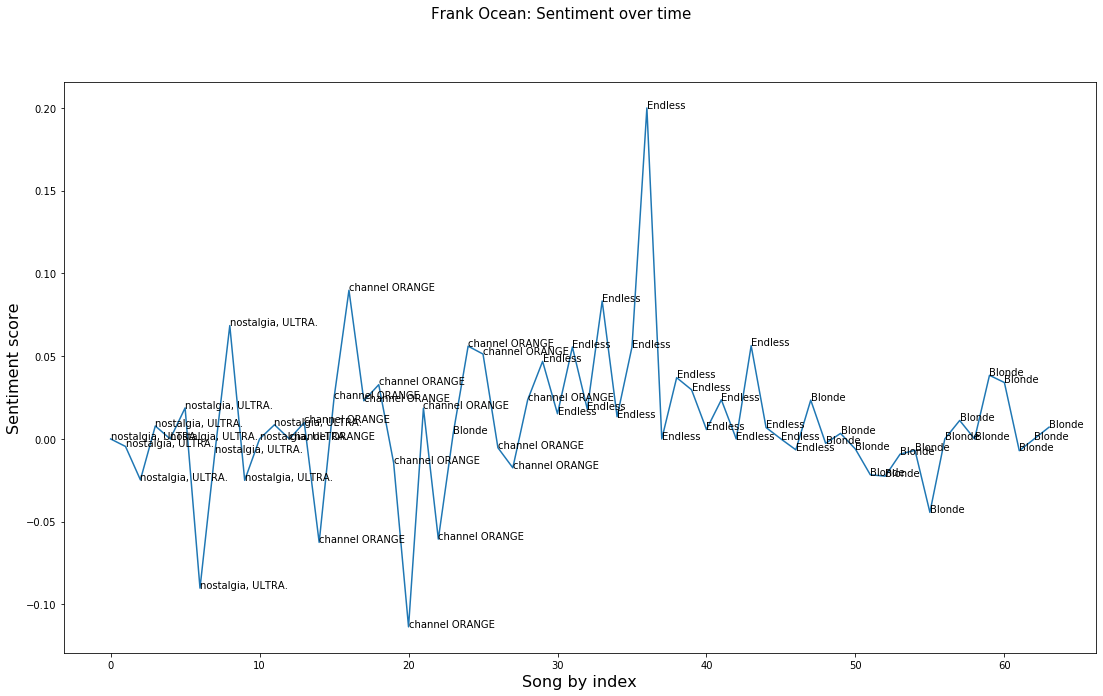

In [67]:

# sorted_songs_artist = sorted(completeartist, key=lambda x: x["release_date"])
album = numpy.array([p["album"] for p in completeartist])

sentiment_scores = numpy.array([p["score"] for p in completeartist])

from matplotlib.pyplot import figure
# figure(num=None, figsize=(40, 40), dpi=80, facecolor='w', edgecolor='k')
fig, ax = pyplot.subplots()
ax.plot(sentiment_scores)
# for i in enumerate(range(len(sentiment_scores))):
#     print (i)
for i in range(len(sentiment_scores)):
    ax.annotate(album[i],(i,sentiment_scores[i]))
fig = pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

fig.suptitle('Frank Ocean: Sentiment over time ', fontsize=15)
pyplot.xlabel('Song by index', fontsize=16)
pyplot.ylabel('Sentiment score', fontsize=16)

In [120]:
completeartist=load_artist("Childish")

['Lyrics_ChildishGambino{.Culdesac.json', 'Lyrics_ChildishGambino{.I-Am-Just-a-Rapper.json', 'Lyrics_ChildishGambino{.Camp.json', 'Lyrics_ChildishGambino{.Because-the-Internet.json', 'Lyrics_ChildishGambino{.STN-MTN-Kauai.json', 'Lyrics_ChildishGambino{.Awaken-My-Love.json', 'Lyrics_ChildishGambino{.Summer-Pack.json']


In [121]:
sorted_songs_artist = sorted(completeartist, key=lambda x: x["score"])
#paragraphs are very long, the number of words is proprotional to a larger scores
## Display the 10 most negative
for song in sorted_songs_artist[0:9]:
    print("{}\n{}".format(song['score'], song['text']))




-0.06563706563706563
Welcome to the culdesac, this is where the street ends
I am just a rapper, I ain't got the time for speakin'
Nigga stay weak like tornado and a tree branch
I never have a weak day, my life's a long weekend
Fuckin' with ya raw, bitch, my mouth should get tested
Sleepin' on a nigga, hope you feel well rested
Gambino stay on, can't nobody pull the cord out
A nigga fucked up, like a hang gliding whore house
Sick boy, yeah, the clique on deck
Yes, I rap absurd, got the game upset
And they rap about the jewelry, the weed they smoke
And I rap about my life, and niggas think it's a joke, nah
I only put real on a nigga
Bitches see the money, try and steal on a nigga
Yes, I'm on fire, you can feel it on a nigga
Step away from the heat; they Shaquillin' on a nigga
Treat niggas like pussy, go hard on 'em
Watch the swagga get swiped like a card, bottom
The swag's unique, I don't even worry 'bout 'em
I got the tortoise shell frames and the argyle
You wouldn't think from the thin

In [122]:
## ... and the 10 most positive
for song in sorted_songs_artist[-10:-1]:
    print("\n{}\n{}\n{}\n\n{}".format(song['score'],song['album'],song['title'],song['text']))
    
#smoothing parameter?


0.037142857142857144
I AM JUST A RAPPER
49ers (Orange Shirt)

Whoa!
What'd you get, amnesia?
I bet you wouldn't sleep on me if I was Lil' Weezy, huh?
Bet you wouldn't sleep on me if I was in a band or something
And my bank balance were around a grand or something
Ask you something:
Do you think I'm common like sense is?
That heaven didn't send this
Uniquely perfect dude so just discard me like a toy, then
But you know, I know, I'd make a damn good boyfriend
Oil can, oil can
You think I'm the Tin Man
You took my little heart and you kicked it like a tin can
Ain't you heard I got the kind of shine can make your skin tan?
In the lean time don't come crying for the thin man
In the meantime I'll be building my portfolio
All these other dudes eradicated like polio
With any luck you'll see me everywhere like Starbucks
I bet you'll wanna fuck me when it's time to star fuck

I didn't have green like an Arizona front lawn
Now they try to touch my face like an iPhone
Now I'm all gassed up like E

['Culdesac' 'Culdesac' 'Culdesac' 'Culdesac' 'Culdesac' 'Culdesac'
 'Culdesac' 'Culdesac' 'Culdesac' 'Culdesac' 'Culdesac' 'Culdesac'
 'Culdesac' 'Culdesac' 'Culdesac' 'I AM JUST A RAPPER'
 'I AM JUST A RAPPER' 'I AM JUST A RAPPER' 'I AM JUST A RAPPER'
 'I AM JUST A RAPPER' 'I AM JUST A RAPPER' 'I AM JUST A RAPPER' 'Camp'
 'Camp' 'Camp' 'Camp' 'Camp' 'Camp' 'Camp' 'Camp' 'Camp' 'Camp' 'Camp'
 'Camp' 'Camp' 'Because the Internet' 'Because the Internet'
 'Because the Internet' 'Because the Internet' 'Because the Internet'
 'Because the Internet' 'Because the Internet' 'Because the Internet'
 'Because the Internet' 'Because the Internet' 'Because the Internet'
 'Because the Internet' 'Because the Internet' 'Because the Internet'
 'Because the Internet' 'Because the Internet' 'Because the Internet'
 'STN MTN / Kauai' 'STN MTN / Kauai' 'STN MTN / Kauai' 'STN MTN / Kauai'
 'STN MTN / Kauai' 'STN MTN / Kauai' 'STN MTN / Kauai' 'STN MTN / Kauai'
 'STN MTN / Kauai' 'STN MTN / Kauai' 'STN MTN / 

Text(0, 0.5, 'Sentiment score')

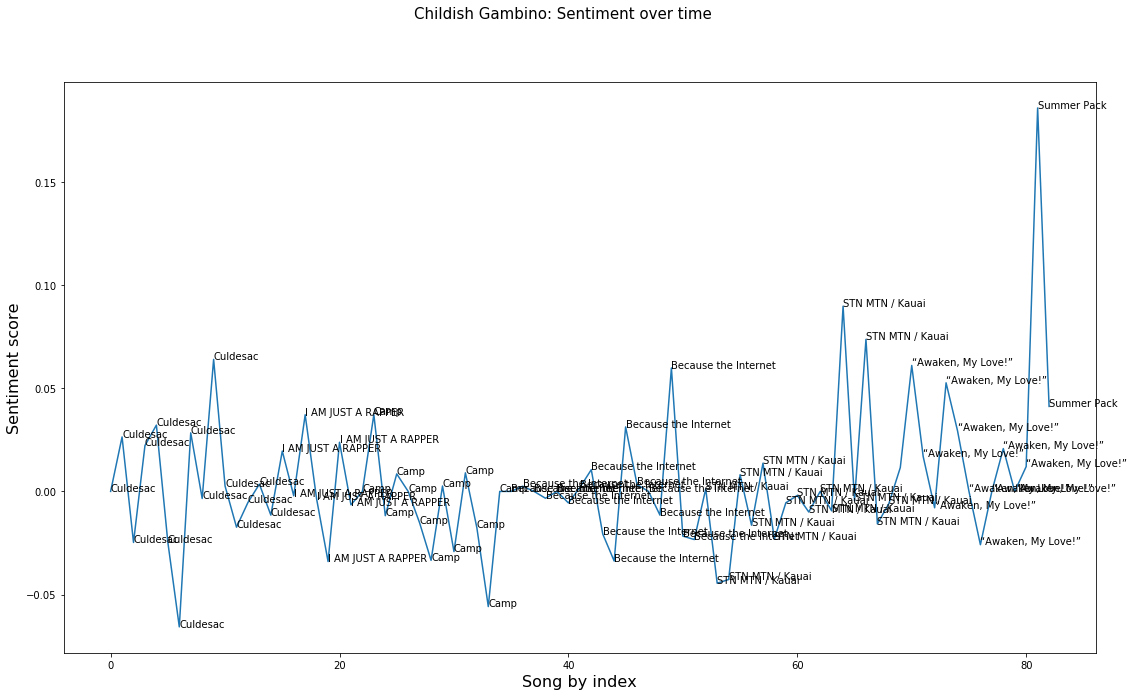

In [123]:
album = numpy.array([p["album"] for p in completeartist])
print (album)
sentiment_scores = numpy.array([p["score"] for p in completeartist])

from matplotlib.pyplot import figure
# figure(num=None, figsize=(40, 40), dpi=80, facecolor='w', edgecolor='k')
fig, ax = pyplot.subplots()
ax.plot(sentiment_scores)
# for i in enumerate(range(len(sentiment_scores))):
#     print (i)
for i in range(len(sentiment_scores)):
    ax.annotate(album[i],(i,sentiment_scores[i]))
fig = pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

fig.suptitle('Childish Gambino: Sentiment over time', fontsize=15)
pyplot.xlabel('Song by index', fontsize=16)
pyplot.ylabel('Sentiment score', fontsize=16)

In [124]:
import pandas as pd 
df = pd.DataFrame(completeartist)

print (type(df))
# df.groupby(["album"]).groups
df['score'].groupby(df['album']).describe()

<class 'pandas.core.frame.DataFrame'>


,count,mean,std,min,25%,50%,75%,max
album,,,,,,,,
Because the Internet,17.0,-0.000615,0.021554,-0.033742,-0.011494,0.000000,0.002513,0.059829
Camp,13.0,-0.008127,0.023178,-0.055804,-0.017578,0.000000,0.002621,0.037209
Culdesac,15.0,0.001773,0.030582,-0.065637,-0.014418,0.000000,0.024308,0.063973
I AM JUST A RAPPER,7.0,0.004889,0.023722,-0.033981,-0.005088,-0.002128,0.021681,0.037143
STN MTN / Kauai,17.0,0.000405,0.034333,-0.044503,-0.015723,-0.005515,0.001258,0.089744
Summer Pack,2.0,0.113509,0.102262,0.041199,0.077354,0.113509,0.149664,0.185819
"“Awaken, My Love!”",11.0,0.014455,0.025794,-0.025830,0.000000,0.012048,0.025079,0.061033


In [72]:
completeartist=load_artist("Kanye")

Late Registration change
The College Dropout change
The College Dropout change
The College Dropout change
The College Dropout change
['Lyrics_KanyeWest{.The-College-Dropout.json', 'Lyrics_KanyeWest{.Late-Registration.json', 'Lyrics_KanyeWest{.Graduation.json', 'Lyrics_KanyeWest{.808s-Heartbreak.json', 'Lyrics_KanyeWest{.My-Beautiful-Dark-Twisted-Fantasy.json', 'Lyrics_KanyeWest{.Yeezus.json', 'Lyrics_KanyeWest{.The-Life-of-Pablo.json', 'Lyrics_KanyeWest{.ye.json', 'Lyrics_KanyeWest{.Jesus-is-King.json']
The College Dropout change
The College Dropout change
The College Dropout change
The College Dropout change
Late Registration change


In [73]:
sorted_songs_artist = sorted(completeartist, key=lambda x: x["score"])
#paragraphs are very long, the number of words is proprotional to a larger scores
## Display the 10 most negative
for song in sorted_songs_artist[0:9]:
    print("{}\n{}".format(song['score'], song['text']))


-0.07692307692307693
Every knee shall bow
Every tongue confess
Jesus is Lord
Jesus is Lord
Every knee shall bow
Every tongue confess
Jesus is Lord
Jesus is Lord
-0.07531380753138076
Turn me up!

Step up in this bitch like (Turn me up!)
I'm the one your bitch like
Yeah I'm the one your bitch like (Turn me up!)
And I be talkin' shit like
I ain't scared to lose a fistfight (Turn me up!)
And she grabbin' on my, like
She wanna see if it'll fit right (Turn me up!)
That's just the wave

(Yeah) Waves don't die
Let me crash here for the moment, yeah
I don't need to own it
No lie
Waves don't die, baby
Let me crash here for a moment
Baby, I don't, I don't need to own you
(Yeah, yeah, yeah, yeah) (Turn me up!)

Sun don't shine in the shade, ugh (Turn me up!)
Bird can't fly in a cage, ugh (Turn me up!)
Even when somebody go away (Turn me up!)
The feelings don't really go away
That's just the wave

(Yeah) Waves don't die
Let me crash here for the moment
I don't need to own it
No lie
Waves don't die,

In [74]:
## ... and the 10 most positive
for song in sorted_songs_artist[-10:]:
    print("\n{}\n{}\n{}\n\n{}".format(song['score'],song['album'],song['title'],song['text']))
    
#smoothing parameter?


0.057971014492753624
Late Registration
Wake Up Mr. West

Oh, ho-ho-ho!
I knew I was gon' see, I knew I was gon' see you again! Knew I was gon' see you again!
Where your goddamn book bag at?
Always carryin' that lil' book bag, nobody wants to see that!
Goddamn 4th grader, sit your ass down!
He wanna play it again like he got somethin' else to do
You ain't got somethin' else to do!
You ain't doin' nothin' wit' your life, notin' wit' your life!
You think this is?
You better look at me when I'm talkin' to you!
You think this shit easy, don't you?
You think this is promised!
Well ain't nothin' promised to you!
Look at my face, do I got a promised face?
Does it look like I promised you anything?
Kanye, nigga-is you snorin' in my class?
Wake up Mr. West!

0.058823529411764705
808s & Heartbreak
Street Lights

Let me know
Do I still got time to grow?
Things ain't always set in stone
That be known let me know
Let me...

Seems like street lights, glowing, happen to be
Just like moments, passing,

Text(0, 0.5, 'Sentiment score')

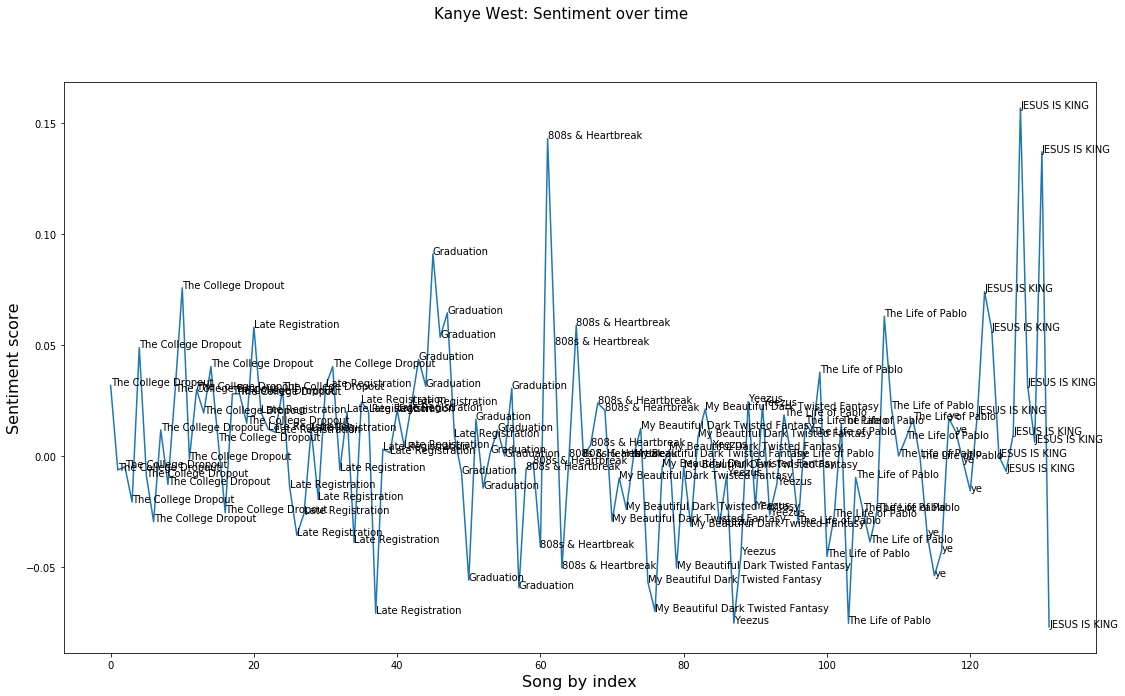

In [75]:
# sort by release date
# sorted_songs_artist = sorted(completeartist, key=lambda x: x["release_date"])
album = numpy.array([p["album"] for p in completeartist])
# print (album)
sentiment_scores = numpy.array([p["score"] for p in completeartist])

from matplotlib.pyplot import figure
# figure(num=None, figsize=(40, 40), dpi=80, facecolor='w', edgecolor='k')
fig, ax = pyplot.subplots()
ax.plot(sentiment_scores)
# for i in enumerate(range(len(sentiment_scores))):
#     print (i)
for i in range(len(sentiment_scores)):
#     if album[i]!=album[i-1]:
    ax.annotate(album[i],(i,sentiment_scores[i]))
fig = pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Kanye West: Sentiment over time ', fontsize=15)
pyplot.xlabel('Song by index', fontsize=16)
pyplot.ylabel('Sentiment score', fontsize=16)

In [99]:
completeartist=load_artist("Kendrick")

['Lyrics_KendrickLamar{.Overly-Dedicated.json', 'Lyrics_KendrickLamar{.Section-80.json', 'Lyrics_KendrickLamar{.good-kid-m-A-A-d-city.json', 'Lyrics_KendrickLamar{.To-Pimp-a-Butterfly.json', 'Lyrics_KendrickLamar{.DAMN.json']


In [100]:
sorted_songs_artist = sorted(completeartist, key=lambda x: x["score"])
#paragraphs are very long, the number of words is proprotional to a larger scores
## Display the 10 most negative
for song in sorted_songs_artist[0:9]:
    print ()
    print (song)
    print (song['title'])

    print (song['album'])
    print("{}\n{}".format(song['score'], song['text']))


{'title': 'Night of the Living Junkies', 'album': 'Overly Dedicated', 'text': "I remember, uhh\nWhen my uncles\nServed smokers\nOn Alondra\nIn front of our building, they was my heroes\n\nThis shit is so dope, you might wanna be my crack hoe\nThis shit is so dope, you might wanna be my crack hoe\nBad bitches, crackheads, street niggas, crack hoes\nThis shit is so dope, you might wanna be my crack hoe\n\nUhh, and that's scary to me\nDope beat, dope flow, vary to me\nEspecially when Sounwave is on his P's\nNigga cue me in I'm a Peruvian drug lord\nDon't fast forward, I'ma serve you some keys\nThis is crack co-caine, I'm Kurt Co-bain\nAnd I bang like a C-R-I-P\nP-I-R-U, high you I'm a I-V\nThis shit is so dope, you might wanna be my crack— STOP\nI said a I-V cuz when I be in the studio, I shot\nA needle in your veins, take it in vein\nOr itch till your eyeballs pop\nI'm cold on the cold turkey\nI hate chickens but I do fuck pretty birdies\nWhere your girl at? Over the Pyrex, where my wor

In [101]:
for song in sorted_songs_artist[-10:]:
    print ()
    print (song['title'])
    print (song['album'])
    print("{}\n{}".format(song['score'], song['text']))


Poetic Justice
good kid, m.A.A.d city (Deluxe Version)
0.0176017601760176
Every second, every minute
Man, I swear that she can get it
Say if you a bad bitch, put your hands up high
Hands up high, hands up high
Tell 'em dim the lights down right now
Put me in the mood
I'm talkin' about dark room, perfume, go, go

I recognize your fragrance
Hold up, you ain't never gotta say shit
Uh, and I know your taste is
A little bit, hmm, high maintenance
Uh, everybody else basic
You live life on an everyday basis
With poetic justice, poetic justice
If I told you that a flower bloomed in a dark room
Would you trust it?
I mean, I write poems in these songs dedicated to you when
You're in the mood for empathy, there's blood in my pen
Better yet, where your friends and 'em?
I really wanna know you all
I really wanna show you off
Fuck that, pour up plenty of champagne
Cold nights when you curse this name
You called up your girlfriends
And y'all curled in that little bitty Range
I heard that she wanna g

In [102]:
import pandas as pd 
df = pd.DataFrame(completeartist)

print (type(df))
# df.groupby(["album"]).groups
df['score'].groupby(df['album']).describe()

<class 'pandas.core.frame.DataFrame'>


,count,mean,std,min,25%,50%,75%,max
album,,,,,,,,
DAMN.,14.0,-0.001689,0.039125,-0.078947,-0.025514,-0.003891,0.023682,0.067454
Overly Dedicated,16.0,-0.018920,0.028306,-0.090265,-0.040028,-0.013348,-0.002228,0.019259
Section.80,16.0,-0.017316,0.025625,-0.053161,-0.034859,-0.014659,-0.007250,0.037415
To Pimp a Butterfly,16.0,-0.017448,0.021829,-0.047562,-0.034726,-0.017466,-0.002557,0.030166
"good kid, m.A.A.d city (Deluxe Version)",12.0,-0.009652,0.027466,-0.075255,-0.018141,-0.006911,-0.001162,0.040098


Text(0, 0.5, 'Sentiment score')

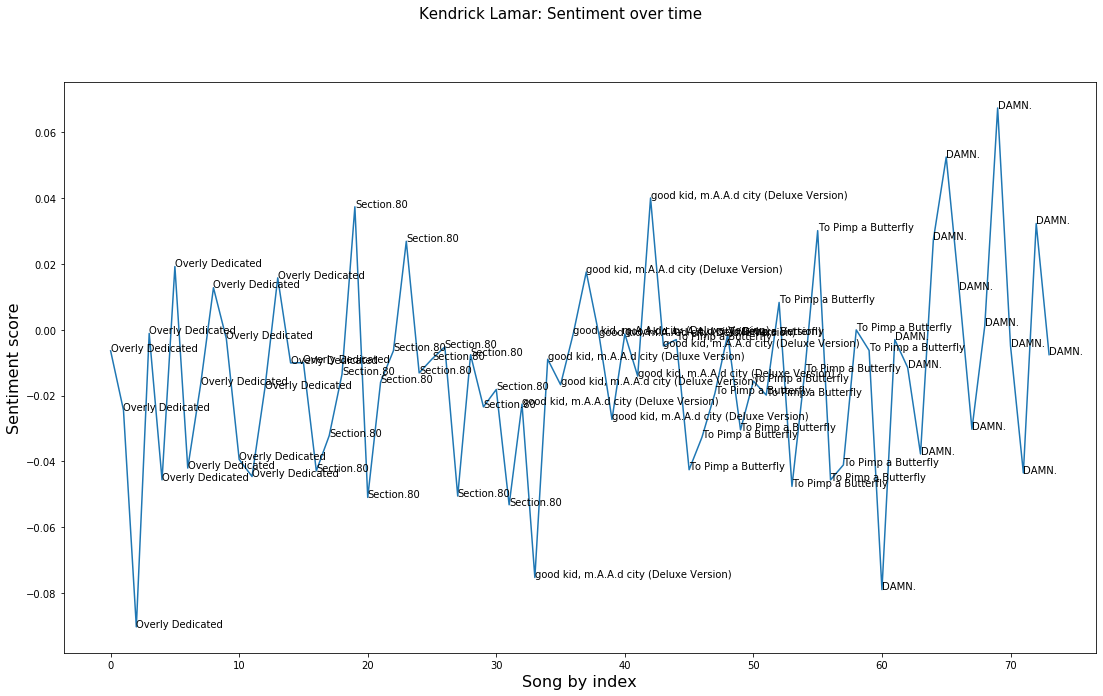

In [103]:
# sort by release date
# sorted_songs_artist = sorted(completeartist, key=lambda x: x["release_date"])
album = numpy.array([p["album"] for p in completeartist])
title = numpy.array([p["title"] for p in completeartist])

# print (album)
sentiment_scores = numpy.array([p["score"] for p in completeartist])

from matplotlib.pyplot import figure
# figure(num=None, figsize=(40, 40), dpi=80, facecolor='w', edgecolor='k')
fig, ax = pyplot.subplots()
ax.plot(sentiment_scores)
# for i in enumerate(range(len(sentiment_scores))):
#     print (i)
for i in range(len(sentiment_scores)):
#     if album[i]!=album[i-1]:
    ax.annotate(album[i],(i,sentiment_scores[i]))
fig = pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Kendrick Lamar: Sentiment over time ', fontsize=15)
pyplot.xlabel('Song by index', fontsize=16)
pyplot.ylabel('Sentiment score', fontsize=16)

In [115]:
completeartist=load_artist("Vince")

['Lyrics_VinceStaples{.Summertime-06.json', 'Lyrics_VinceStaples{.Big-Fish-Theory.json', 'Lyrics_VinceStaples{.FM.json']


In [116]:
sorted_songs_artist = sorted(completeartist, key=lambda x: x["score"])
#paragraphs are very long, the number of words is proprotional to a larger scores
## Display the 10 most negative
for song in sorted_songs_artist[0:9]:
    print ()
#     print (song)
    print (song['title'])

    print (song['album'])
    print("{}\n{}".format(song['score'], song['text']))


Hang N’ Bang
Summertime ’06
-0.07263922518159806
Wanna hang, wanna bang, wanna slang?
Wanna hang, wanna bang, wanna slang?
Wanna hang, wanna bang, wanna slang?
Wanna hang, wanna bang, wanna slang?
Wanna hang, wanna bang, wanna slang?
Wanna hang, wanna bang, wanna slang?
Wanna hang, wanna bang, wanna slang?
Wanna hang, wanna bang, wanna slang?

Skinny nigga from the Northside (That's true)
Fuck a Swisher, burn a 45 (That's true)
Keep it hidden in tight jeans (That's true)
Shoot a nigga 'fore he fight me (That's true)
Skipped school in sixth grade (That's true)
Rite Aid, stealing ice cream (That's true)
Spray paint for the cap guns (That's true)
Held up for his Nikes (That's true)
Pro club on the white tee (That's true)
NYs on the NEs (That's true)
Six fives for my enemies (That's true)
Pop lock when you find me (That's true)
Eight shots in the Hi-point (That's true)
But a jam at about three (That's true)
Walk up, never drive-by (That's true)
Back through when the cops leave (That's tru

In [117]:
for song in sorted_songs_artist[-10:]:
    print ()
    print (song['title'])
    print (song['album'])
    print("{}\n{}".format(song['score'], song['text']))


Homage
Big Fish Theory
0.012224938875305624
Go stupid
Don't think too much, you gon' lose it
Just lose yourself in the music
Get off your ass and move that thang, girl
All my girls is my main girl
'Round the world in them planes
Still ain't changed, still slightly deranged
Still O.C., I won't be restrained, girl

These niggas won't hold me back
These niggas won't hold me back
These niggas won't hold me back
These niggas won't hold me back
These hoes won't hold me back
These hoes won't hold me back
These hoes won't hold me back
These hoes won't hold me back

Outrun my gun, I'm the bigshot now
Prima Donna had them like "wow!"
Hitchcock of my modern day
Where the fuck is my VMA?
Where the fuck is my Grammy?
Supermodels wearin' no panties
Supercars, not drivin' no Camry
Fresh meals on the table, no Rally's

These niggas won't hold me back
These niggas won't hold me back
These niggas won't hold me back
These niggas won't hold me back
These hoes won't hold me back
These hoes won't hold me b

['Summertime ’06' 'Summertime ’06' 'Summertime ’06' 'Summertime ’06'
 'Summertime ’06' 'Summertime ’06' 'Summertime ’06' 'Summertime ’06'
 'Summertime ’06' 'Summertime ’06' 'Summertime ’06' 'Summertime ’06'
 'Summertime ’06' 'Summertime ’06' 'Summertime ’06' 'Summertime ’06'
 'Summertime ’06' 'Summertime ’06' 'Summertime ’06' 'Summertime ’06'
 'Big Fish Theory' 'Big Fish Theory' 'Big Fish Theory' 'Big Fish Theory'
 'Big Fish Theory' 'Big Fish Theory' 'Big Fish Theory' 'Big Fish Theory'
 'Big Fish Theory' 'Big Fish Theory' 'Big Fish Theory' 'Big Fish Theory'
 'FM!' 'FM!' 'FM!' 'FM!' 'FM!' 'FM!' 'FM!' 'FM!' 'FM!' 'FM!' 'FM!']


Text(0, 0.5, 'Sentiment score')

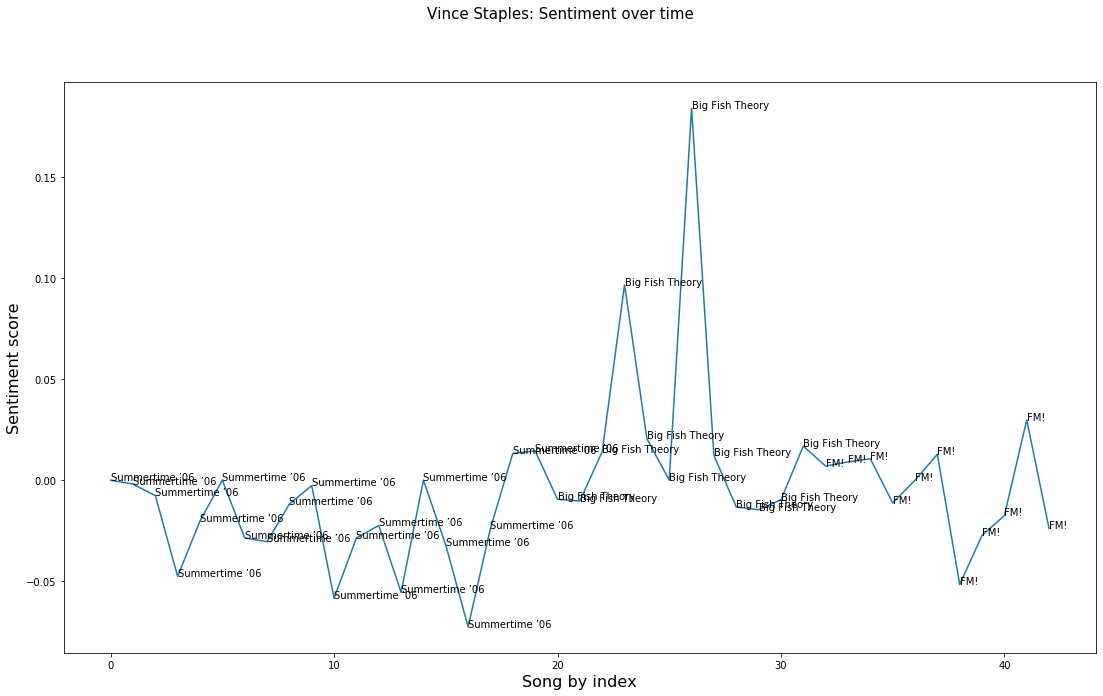

In [119]:
# sort by release date
# sorted_songs_artist = sorted(completeartist, key=lambda x: x["release_date"])
album = numpy.array([p["album"] for p in completeartist])
title = numpy.array([p["title"] for p in completeartist])

print (album)
sentiment_scores = numpy.array([p["score"] for p in completeartist])

from matplotlib.pyplot import figure
# figure(num=None, figsize=(40, 40), dpi=80, facecolor='w', edgecolor='k')
fig, ax = pyplot.subplots()
ax.plot(sentiment_scores)
# for i in enumerate(range(len(sentiment_scores))):
#     print (i)
for i in range(len(sentiment_scores)):
#     if album[i]!=album[i-1]:
    ax.annotate(album[i],(i,sentiment_scores[i]))
fig = pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Vince Staples: Sentiment over time ', fontsize=15)
pyplot.xlabel('Song by index', fontsize=16)
pyplot.ylabel('Sentiment score', fontsize=16)

In [109]:
import pandas as pd 
df = pd.DataFrame(completeartist)

print (type(df))
# df.groupby(["album"]).groups
df['score'].groupby(df['album']).describe()

<class 'pandas.core.frame.DataFrame'>


,count,mean,std,min,25%,50%,75%,max
album,,,,,,,,
Big Fish Theory,12.0,0.023952,0.058920,-0.014670,-0.009859,0.006112,0.017802,0.184307
FM!,11.0,-0.005679,0.023176,-0.051693,-0.020748,0.000000,0.009840,0.029851
Summertime ’06,20.0,-0.020848,0.024086,-0.072639,-0.030881,-0.021319,-0.001468,0.014493


In [110]:
completeartist=load_artist("A$AP")

['Lyrics_A$APRocky{.LIVE-LOVE-A-AP.json', 'Lyrics_A$APRocky{.LONG-LIVE-A-AP.json', 'Lyrics_A$APRocky{.AT-LONG-LAST-A-AP.json', 'Lyrics_A$APRocky{.TESTING.json']


In [111]:
sorted_songs_artist = sorted(completeartist, key=lambda x: x["score"])
#paragraphs are very long, the number of words is proprotional to a larger scores
## Display the 10 most negative
for song in sorted_songs_artist[0:9]:
    print ()
#     print (song)
    print (song['title'])

    print (song['album'])
    print("{}\n{}".format(song['score'], song['text']))


Fine Whine
AT.LONG.LAST.A$AP
-0.08453608247422681
This love, this love, this love won't last forever
This love, this love, this love gon' own our eyes

This love, this love, this love won't last forever
And this love, and this love, and this love gon' own our

I think my cup is getting muddy, oh buddy
Is this that punch, drunk, and love it, no buggy?
Eyes bloody when we out in public
I'm hubby, she say she love me
Wasted money on syrup and honey, she think she Duffy
Then I became a druggy, enhanced my fame and money
And for your pain and suffering, my karma's waiting for me
Expecting payments from me
But she won't get a damn thing from me
She just might get a band-aid from me
You swear the Benz and these bands ain't from me

I know I'm a scumbag and now your heart broke
The night is still young, for you to sip and whine
(Slow, slow, slow) Lemme see you whine
(Slow, slow, slow, oh yeah)
I know your heart is broken, pick up your wine glass
With your fine ass, before you whine fast whine

In [112]:
for song in sorted_songs_artist[-10:]:
    print ()
    print (song['title'])
    print (song['album'])
    print("{}\n{}".format(song['score'], song['text']))


West Side Highway
AT.LONG.LAST.A$AP
0.010958904109589041
These days of preference has no complexion
You could be light, dark, mixed or fair skin
Just light the candle
Cold sweats down the handle, life's a gamble
And she know
Love with me is like a casino, outside of Reno
A couple white lines
A cup of white wine of Pinot, Italian Grigio
House keys to P.O
Ride from overseas but that's basic
Wasted, high on the West Side Highway
Drunk enough to fuck with, face it

Hangovers, leftovers in the Range Rover
Shame on her, make up or get a makeover
Think over, Glenfiddich start to takeover
When I brainstorm, all the hoes ain't got a thing on her
Audemars, season order like summer fall
I throw the Audemars, then I throw out all the ball
New Dior from the boutique store
Only thing in common that we got is that we want it all
Little cutie pie, saw her looking super fly
More Justin Timberlake on my suit and tie
Try to scrutinize, cause I keep two inside
Suicides? No sir, hoes get the Uber ride
Or 

['LIVE.LOVE.A$AP' 'LIVE.LOVE.A$AP' 'LIVE.LOVE.A$AP' 'LIVE.LOVE.A$AP'
 'LIVE.LOVE.A$AP' 'LIVE.LOVE.A$AP' 'LIVE.LOVE.A$AP' 'LIVE.LOVE.A$AP'
 'LIVE.LOVE.A$AP' 'LIVE.LOVE.A$AP' 'LIVE.LOVE.A$AP' 'LIVE.LOVE.A$AP'
 'LIVE.LOVE.A$AP' 'LIVE.LOVE.A$AP' 'LIVE.LOVE.A$AP' 'LIVE.LOVE.A$AP'
 'LONG.LIVE.A$AP (Deluxe Version)' 'LONG.LIVE.A$AP (Deluxe Version)'
 'LONG.LIVE.A$AP (Deluxe Version)' 'LONG.LIVE.A$AP (Deluxe Version)'
 'LONG.LIVE.A$AP (Deluxe Version)' 'LONG.LIVE.A$AP (Deluxe Version)'
 'LONG.LIVE.A$AP (Deluxe Version)' 'LONG.LIVE.A$AP (Deluxe Version)'
 'LONG.LIVE.A$AP (Deluxe Version)' 'LONG.LIVE.A$AP (Deluxe Version)'
 'LONG.LIVE.A$AP (Deluxe Version)' 'LONG.LIVE.A$AP (Deluxe Version)'
 'AT.LONG.LAST.A$AP' 'AT.LONG.LAST.A$AP' 'AT.LONG.LAST.A$AP'
 'AT.LONG.LAST.A$AP' 'AT.LONG.LAST.A$AP' 'AT.LONG.LAST.A$AP'
 'AT.LONG.LAST.A$AP' 'AT.LONG.LAST.A$AP' 'AT.LONG.LAST.A$AP'
 'AT.LONG.LAST.A$AP' 'AT.LONG.LAST.A$AP' 'AT.LONG.LAST.A$AP'
 'AT.LONG.LAST.A$AP' 'AT.LONG.LAST.A$AP' 'AT.LONG.LAST.A$AP'
 'AT.

Text(0, 0.5, 'Sentiment score')

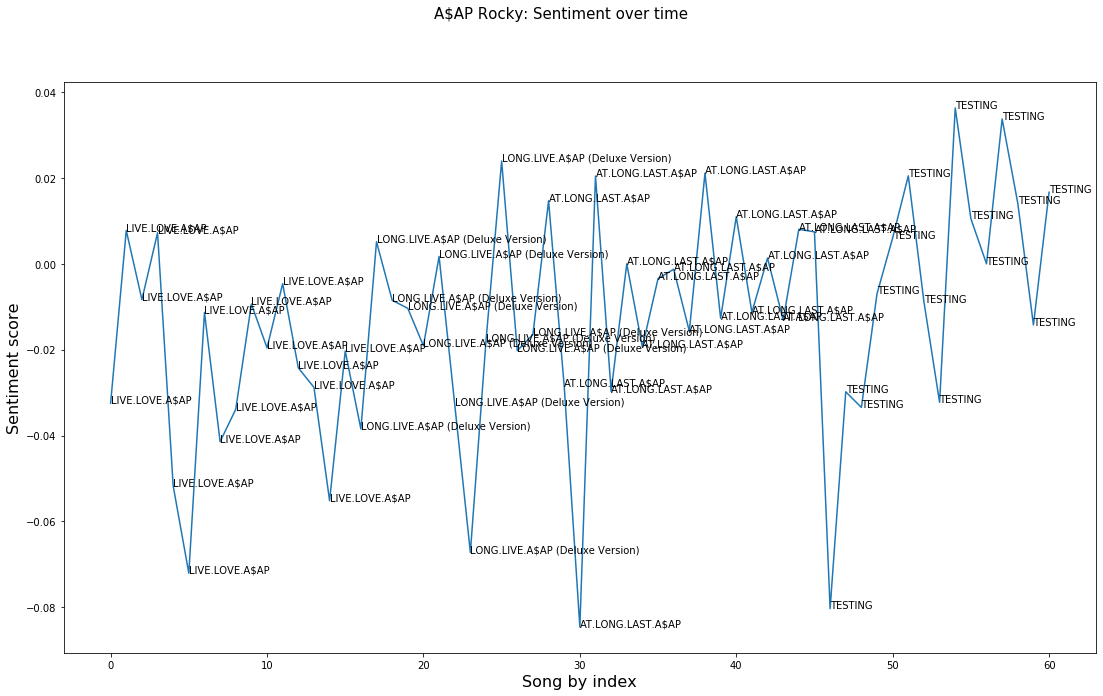

In [114]:
# sort by release date
# sorted_songs_artist = sorted(completeartist, key=lambda x: x["release_date"])
album = numpy.array([p["album"] for p in completeartist])
title = numpy.array([p["title"] for p in completeartist])

print (album)
sentiment_scores = numpy.array([p["score"] for p in completeartist])

from matplotlib.pyplot import figure
# figure(num=None, figsize=(40, 40), dpi=80, facecolor='w', edgecolor='k')
fig, ax = pyplot.subplots()
ax.plot(sentiment_scores)
# for i in enumerate(range(len(sentiment_scores))):
#     print (i)
for i in range(len(sentiment_scores)):
#     if album[i]!=album[i-1]:
    ax.annotate(album[i],(i,sentiment_scores[i]))
fig = pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
fig.suptitle('A$AP Rocky: Sentiment over time ', fontsize=15)
pyplot.xlabel('Song by index', fontsize=16)
pyplot.ylabel('Sentiment score', fontsize=16)

In [90]:
import pandas as pd 
df = pd.DataFrame(completeartist)

print (type(df))
# df.groupby(["album"]).groups
df['score'].groupby(df['album']).describe()

<class 'pandas.core.frame.DataFrame'>


,count,mean,std,min,25%,50%,75%,max
album,,,,,,,,
AT.LONG.LAST.A$AP,18.0,-0.007535,0.024534,-0.084536,-0.015055,-0.002347,0.007889,0.021108
LIVE.LOVE.A$AP,16.0,-0.024889,0.022424,-0.072046,-0.035756,-0.022261,-0.009112,0.007772
LONG.LIVE.A$AP (Deluxe Version),12.0,-0.016680,0.023112,-0.067210,-0.023354,-0.017186,-0.005939,0.023932
TESTING,15.0,-0.004535,0.030487,-0.080292,-0.022013,0.000000,0.015376,0.036290
